In [2]:
import pandas as pd
data = pd.read_csv('Downloads/covid_19_india.csv')
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0


In [3]:
data['Confirmed'] =  data['ConfirmedIndianNational'] + data['ConfirmedForeignNational']
data.drop('ConfirmedIndianNational',axis = 1,inplace=True)
data.drop('ConfirmedForeignNational',axis = 1,inplace=True)
data.head()

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,0,0,1
1,2,31/01/20,6:00 PM,Kerala,0,0,1
2,3,01/02/20,6:00 PM,Kerala,0,0,2
3,4,02/02/20,6:00 PM,Kerala,0,0,3
4,5,03/02/20,6:00 PM,Kerala,0,0,3


In [4]:
#latest data
new_data = data[data['Date'] == data['Date'][len(data)-1]].reset_index()
new_data

,index,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,419,420,28/03/20,10:00 AM,Andaman and Nicobar Islands,0,0,2
1,420,421,28/03/20,10:00 AM,Andhra Pradesh,1,0,14
2,421,422,28/03/20,10:00 AM,Bihar,0,1,9
3,422,423,28/03/20,10:00 AM,Chandigarh,0,0,7
4,423,424,28/03/20,10:00 AM,Chhattisgarh,0,0,6
5,424,425,28/03/20,10:00 AM,Delhi,6,1,39
6,425,426,28/03/20,10:00 AM,Goa,0,0,3
7,426,427,28/03/20,10:00 AM,Gujarat,0,3,45
8,427,428,28/03/20,10:00 AM,Haryana,11,0,33
9,428,429,28/03/20,10:00 AM,Himachal Pradesh,0,1,3


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

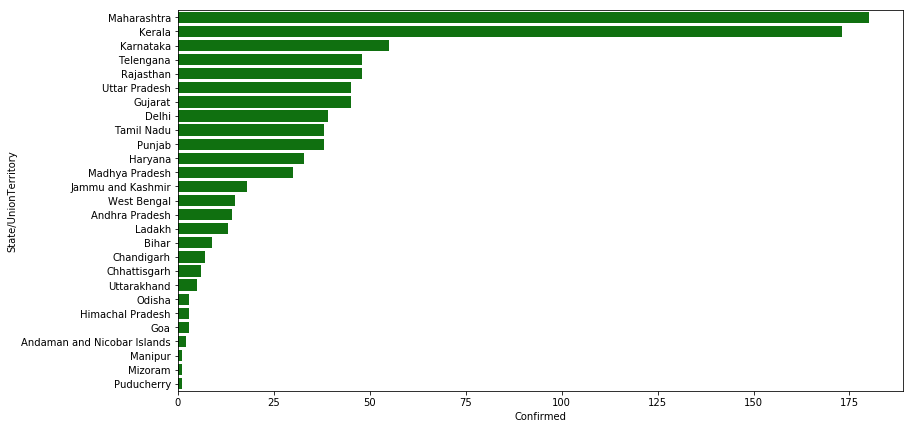

In [9]:
grouped_data = new_data.groupby('State/UnionTerritory')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
temp = grouped_data.sort_values(by='Confirmed', ascending=False)
data = temp[['State/UnionTerritory','Confirmed','Cured','Deaths']]
sns.set_color_codes("muted")
plt.subplots(figsize=(13,7))
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="green")

([<matplotlib.patches.Wedge at 0x22a5f15c320>,
 [Text(0.8771870970645363, 0.6637339804044176, 'Maharashtra'),
  Text(-0.37436164063936334, 1.03433716070622, 'Kerala'),
  Text(-1.0118579800875451, 0.4314434240235365, 'Karnataka'),
  Text(-1.0994231250475552, 0.035620108234926784, 'Telengana'),
  Text(-1.0465285362532784, -0.3387890535533444, 'Rajasthan'),
  Text(-0.877187104832444, -0.6637339701383944, 'Uttar Pradesh'),
  Text(-0.6203527546462689, -0.908384533005041, 'Gujarat'),
  Text(-0.321798172409823, -1.0518773389676659, 'Delhi'),
  Text(-0.021770235678866445, -1.0997845501908483, 'Tamil Nadu'),
  Text(0.27608860124145085, -1.064788751003944, 'Punjab'),
  Text(0.5362309122462693, -0.9604459426493165, 'Haryana'),
  Text(0.7383939853045539, -0.8153369379992902, 'Madhya Pradesh'),
  Text(0.8675424407595612, -0.6762914412299947, 'Jammu and Kashmir'),
  Text(0.9415562457529693, -0.5687458448934589, 'West Bengal'),
  Text(0.9956802360152838, -0.46756910463433016, 'Andhra Pradesh'),
  Tex

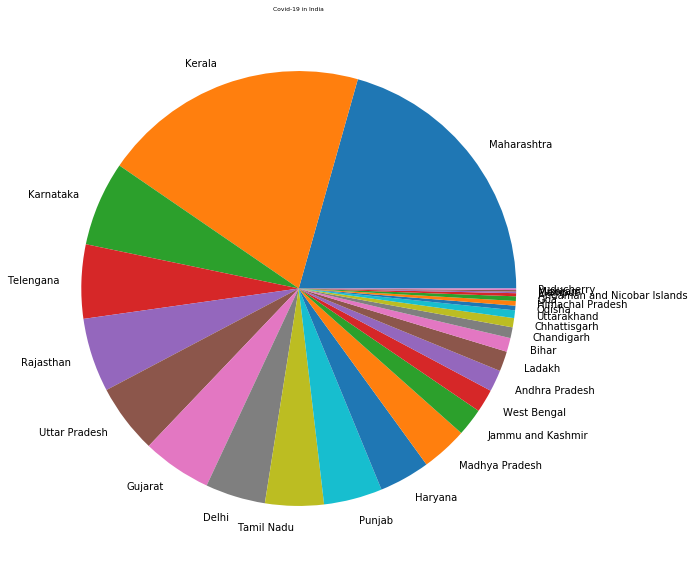

In [10]:
x=temp['Confirmed']
labels=temp['State/UnionTerritory']
plt.figure(figsize=(16,10))
plt.title("Covid-19 in India", fontsize=6)
plt.pie(x,labels=labels)